In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [81]:
class MyDataset(Dataset):
    # 构造函数
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    # 返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)
    # 返回索引的数据与标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [82]:
def map_array(arr):
    mapped_array = []
    for num in arr:
        if num == 0:
            mapped_array.append([1, 0])
        elif num == 1:
            mapped_array.append([0, 1])
    return mapped_array

In [92]:
from scipy.io import loadmat
file6 = "D:\\320 Deep-learning\data\\1118_S6_time1000.mat"
data6 = loadmat(file6)
file12 = "D:\\320 Deep-learning\data\\1111_S12_time1000.mat"
data12 = loadmat(file12)
file24 = "D:\\320 Deep-learning\data\\1111_S24_time1000.mat"
data24 = loadmat(file24)
""" experiment
X_train = data['Input']
X_train = torch.from_numpy(X_train).float()
y_train = data['Stability']
y_train = y_train.astype(np.float32) / 255
y_train = torch.tensor(y_train)
len_train = len(y_train)
X_test = data['PreInput']
X_test = torch.from_numpy(X_test).float()
y_test = data['PreSta']
y_test = y_test.astype(np.float32) / 255
y_test = torch.tensor(y_test)
len_test = len(y_test) """

#simulation
X6 = data6['Input_Abundance']
X6 = torch.from_numpy(X6).float()
y6 = data6['Stability']
y6 = torch.from_numpy(y6).float()

X12 = data12['Input_RelativeAbundance']
X12 = torch.from_numpy(X12).float()
y12 = data12['Stability']
y12 = torch.from_numpy(y12).float()

X24 = data24['Input_RelativeAbundance']
X24 = torch.from_numpy(X24).float()
y24= data24['Stability']
y24 = torch.from_numpy(y24).float()

t = 300
X_train = X6[0:t,:]
y_train = y6[0:t]
X_test = X6[t:1000,:]
y_test = y6[t:1000]

len_train = len(y_train)
len_test = len(y_test)

# total number of 0 or 1 in training data (prepare for weight)
Num_0 = (y_train==0).sum()
Num_1 = (y_train==1).sum()
Weights = torch.Tensor([1/Num_0.item(),1/Num_1.item()])

# 将数据封装成Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

ZeroDivisionError: division by zero

In [84]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 5

# prepare data loaders
train_dataloader = DataLoader(dataset = train_dataset, # 传入的数据集, 必须参数
                               batch_size = batch_size,       # 输出的batch大小
                               shuffle = True,       # 数据是否打乱
                               num_workers = num_workers)      # 进程数, 0表示只有主进程
test_dataloader = DataLoader(dataset = test_dataset, # 传入的数据集, 必须参数
                               batch_size = batch_size,       # 输出的batch大小
                               shuffle = True,       # 数据是否打乱
                               num_workers = num_workers)      # 进程数, 0表示只有主进程


In [85]:
import torch.nn as nn
import torch.nn.functional as F

# define NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(54, 2)
    def forward(self,x):
        #x = self.fc1(x) 
        x = F.sigmoid(self.fc1(x))
        return x

# initialize the NN
model = Net()
#print(model)

In [86]:
# specify loss function
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss(weight=Weights)
# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

tensor([[0.4986, 0.4605],
        [0.4429, 0.4703],
        [0.4958, 0.4591],
        [0.5225, 0.4640],
        [0.5416, 0.4448]], grad_fn=<SigmoidBackward0>)
tensor([0, 0, 0, 0, 1])
tensor(0.7206, grad_fn=<NllLossBackward0>)
tensor([[0.4823, 0.5055],
        [0.5127, 0.4700],
        [0.4703, 0.4857],
        [0.4427, 0.5161],
        [0.4842, 0.4545]], grad_fn=<SigmoidBackward0>)
tensor([0, 0, 0, 0, 0])
tensor(0.6973, grad_fn=<NllLossBackward0>)
tensor([[0.5655, 0.5605],
        [0.4762, 0.5008],
        [0.4653, 0.4541],
        [0.5032, 0.4655],
        [0.4796, 0.4619]], grad_fn=<SigmoidBackward0>)
tensor([0, 0, 0, 0, 0])
tensor(0.6885, grad_fn=<NllLossBackward0>)
tensor([[0.4922, 0.4859],
        [0.4915, 0.5125],
        [0.4828, 0.5349],
        [0.4822, 0.4275],
        [0.5375, 0.4744]], grad_fn=<SigmoidBackward0>)
tensor([0, 0, 1, 1, 0])
tensor(0.6927, grad_fn=<NllLossBackward0>)
tensor([[0.4896, 0.4939],
        [0.5114, 0.4661],
        [0.4689, 0.4591],
        [0.5188, 0

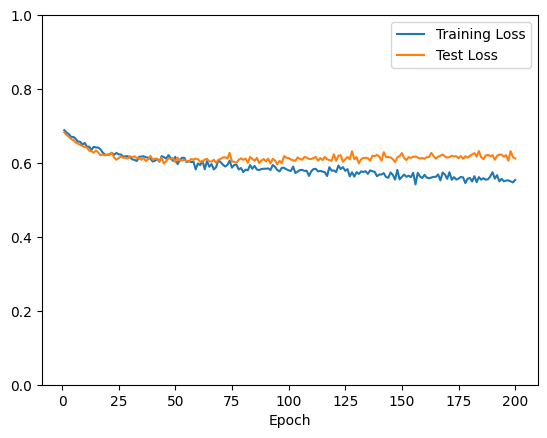

In [87]:
# number of epochs to train the model
n_epochs = 200
train_loss_min = np.Inf  # set initial "min" to infinity
train_loss_curve = list()
test_loss_curve = list()
for epoch in range(n_epochs):
    train_loss = 0
    # train the model #
    loss = 0
    for data, target in train_dataloader: 
        optimizer.zero_grad()
        output = model(data)
        #make target a tensor:torch.Size([10]),dtype = long
        target = target.view(batch_size)
        target = target.long()
        #target = target.T
        loss = criterion(output,target)
        print(output)
        print(target)
        print(loss)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    # calculate average loss over an epoch
    train_loss = train_loss / len_train
    train_loss_curve.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
    
    # save model
    if train_loss <= train_loss_min:
        print('Train loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        train_loss_min,
        train_loss))
        torch.save(model.state_dict(), 'model.pt')
        train_loss_min = train_loss

        test_loss = 0.0
        class_correct = list(0. for i in range(2))
        class_total = list(0. for i in range(2))

    for data, target in test_dataloader:
    # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        target = target.view(batch_size)
        target = target.long()
        print(target)
    # calculate the loss
        loss = criterion(output, target)
    # update test loss 
        test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
        _, pred = torch.max(output, 1)
    #output.argmax(1)
    # compare predictions to true label
        correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    test_loss = test_loss/len_test
    test_loss_curve.append(test_loss)

    
plt.plot(np.linspace(1,n_epochs,n_epochs),train_loss_curve)
plt.plot(np.linspace(1,n_epochs,n_epochs),test_loss_curve)
plt.xlabel("Epoch")
plt.ylim(0,1)
plt.legend(['Training Loss','Test Loss'])
plt.show()

In [88]:
'''model.load_state_dict(torch.load('model.pt'))

test_loss = 0.0
correct = 0
OUTPUT = []
S_pre = torch.Tensor(len_test,1)
S_true = torch.Tensor(len_test,1)

for i in range(len_test):
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(X_test[i])
    o = output.tolist()
    OUTPUT.append(o)'''



"model.load_state_dict(torch.load('model.pt'))\n\ntest_loss = 0.0\ncorrect = 0\nOUTPUT = []\nS_pre = torch.Tensor(len_test,1)\nS_true = torch.Tensor(len_test,1)\n\nfor i in range(len_test):\n    # forward pass: compute predicted outputs by passing inputs to the model\n    output = model(X_test[i])\n    o = output.tolist()\n    OUTPUT.append(o)"

In [89]:
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

for data, target in test_dataloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    target = target.view(batch_size)
    target = target.long()
    print(target)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    #output.argmax(1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        if (target.data[i]>0.5):
            label = 1
        else:
            label = 0
        #label = torch.tensor(target.data[i], dtype=torch.int64)
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
""" test_loss = test_loss/len(test_dataloader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss)) """

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([0, 0, 0, 0, 0])


tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 0])
tensor([1, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([1, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([1, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 0])
tensor([0, 0, 0, 1, 0])
tensor([0, 1, 0, 0, 0])
tensor([0, 0, 0, 0, 1])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([1, 0, 0, 1, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 1, 1, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 1, 0, 1])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 1])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 1])
tensor([0, 0, 0, 0, 0])
tensor([0, 0, 0